In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

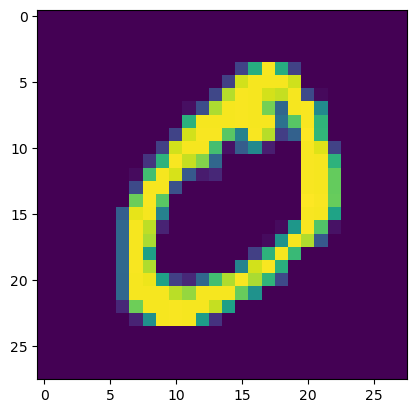

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2354 - accuracy: 0.9532 - val_loss: 0.0875 - val_accuracy: 0.9713
Epoch 2/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0657 - accuracy: 0.9805 - val_loss: 0.1029 - val_accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0829 - val_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.1005 - val_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.1031 - val_accuracy: 0.9772


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10310162603855133, 0.9771999716758728]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 88ms/step
[[2.0552178e-13 1.9966628e-18 3.7226616e-13 1.0377410e-08 2.7986749e-19
  2.4403984e-17 2.4928072e-24 1.0000000e+00 1.8200805e-15 3.1856858e-13]
 [2.0157973e-09 4.8539509e-13 1.0000000e+00 8.7529109e-18 3.4406538e-13
  2.5668960e-19 1.0729622e-11 1.1063439e-19 1.0597434e-12 7.4616199e-24]
 [6.7988536e-12 9.9999678e-01 7.0786939e-07 7.6297068e-12 9.5694008e-07
  6.0009299e-08 9.9316833e-10 4.7395874e-09 1.4416619e-06 1.1360822e-10]
 [9.9999988e-01 6.3747827e-19 4.3458759e-10 8.6834489e-15 9.1461018e-14
  2.5522617e-10 9.2577551e-08 9.3168121e-12 1.3936335e-12 2.0013806e-09]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save("model.h5")

In [17]:
model=load_model("model.h5")

X_train:(60000, 28, 28)
y_train:(60000,)
X_test:(10000, 28, 28)
y_test:(10000,)


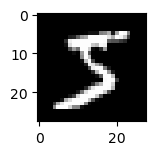

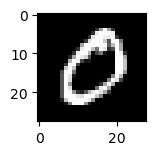

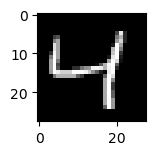

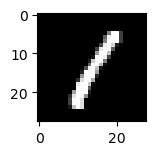

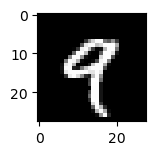

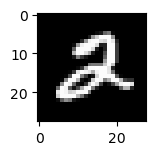

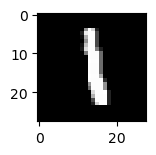

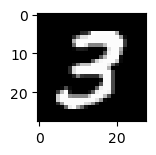

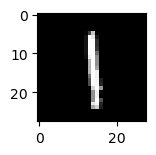

In [18]:
from keras.datasets import mnist
from matplotlib import pyplot
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print('X_train:' +str(X_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(X_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()